Hineill Céspedes - 20213704

PREGUNTA 1

PREGUNTA 2

Se tiene el siguiente sistema de diferencias:
y[n] − 1.3829y[n − 1] + 0.4128y[n − 2] = 0.0675x[n] + 0.1349x[n − 1] + 0.0675x[n − 2]
a) Utilizando ecuaciones recursivas, calcule y grafique la respuesta de estado cero con y[−1] = 0 y y[−2] =
1 para −2 ≤ n ≤ 100.

<StemContainer object of 3 artists>

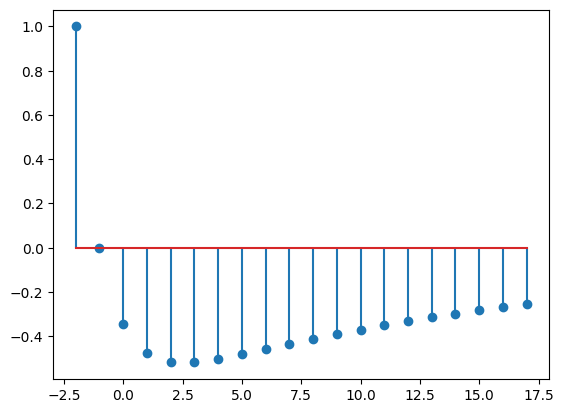

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import sympy as sym
from scipy.signal import lfilter

def respuesta_sistema_segundo_intento(cond1, cond2 , signal , signal_idx):
    salida = np.concatenate( ( np.array([cond1 , cond2]), np.zeros(len(signal)-2))) #Agregamos los indices
    salida_idx = np.arange(signal_idx[0] -2,signal_idx[0] -2 + len(salida) )
    for i in range(len(signal)-2):
        salida[i+2] = 1.3829 *salida[i+1] -0.4128* salida[i] + 0.0675*signal[i+2] + 0.1349*signal[i+1] + 0.0675*signal[i]
    return [salida_idx ,salida]
dirac= np.zeros(20)
dirac[0] =1 
plt.stem(respuesta_sistema_segundo_intento(1,0,dirac,np.arange(len(dirac)))[0] , respuesta_sistema_segundo_intento(1,0,dirac,np.arange(len(dirac)))[1]   )
